___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
from google.colab import drive
drive.mount('/content/drive')
# google drive'ı colab'e bağlamak için bunu çalıştırıp izin vermemiz gerekiyor.

Mounted at /content/drive


In [6]:
# Checking the shape of one image
x_train[5].shape

# numpy array olduğundan shape methodunu çalıştırabiliyorum. 28*28'lik gri  resimler var elimizde.

(28, 28)

In [7]:
x_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

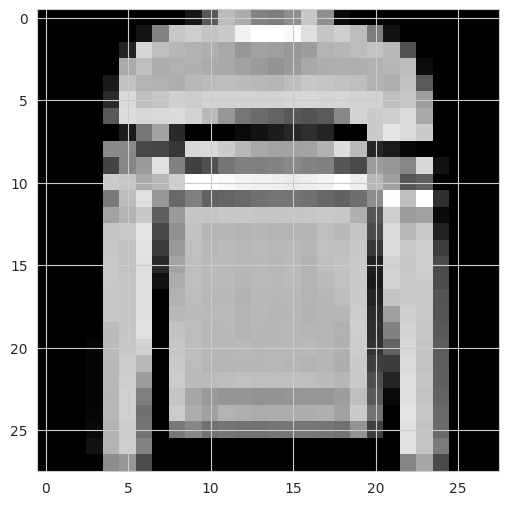

In [8]:
plt.imshow(x_train[5],cmap='gray');


# bize gelen resimler burada  array şeklinde olduğundan bunu plt.imshow ile görselleştirebiliyoruz ama gelen resimler array 
# şeklinde olmasaydı eğer önce arraye çevirip ardından görselleştirebilecektik.
# cmap=None olursa yalancı bir renklendirme yapar .Ama ben gray-scale olduğunu bildiğimden bunu belirtiyorum.

<Axes: >

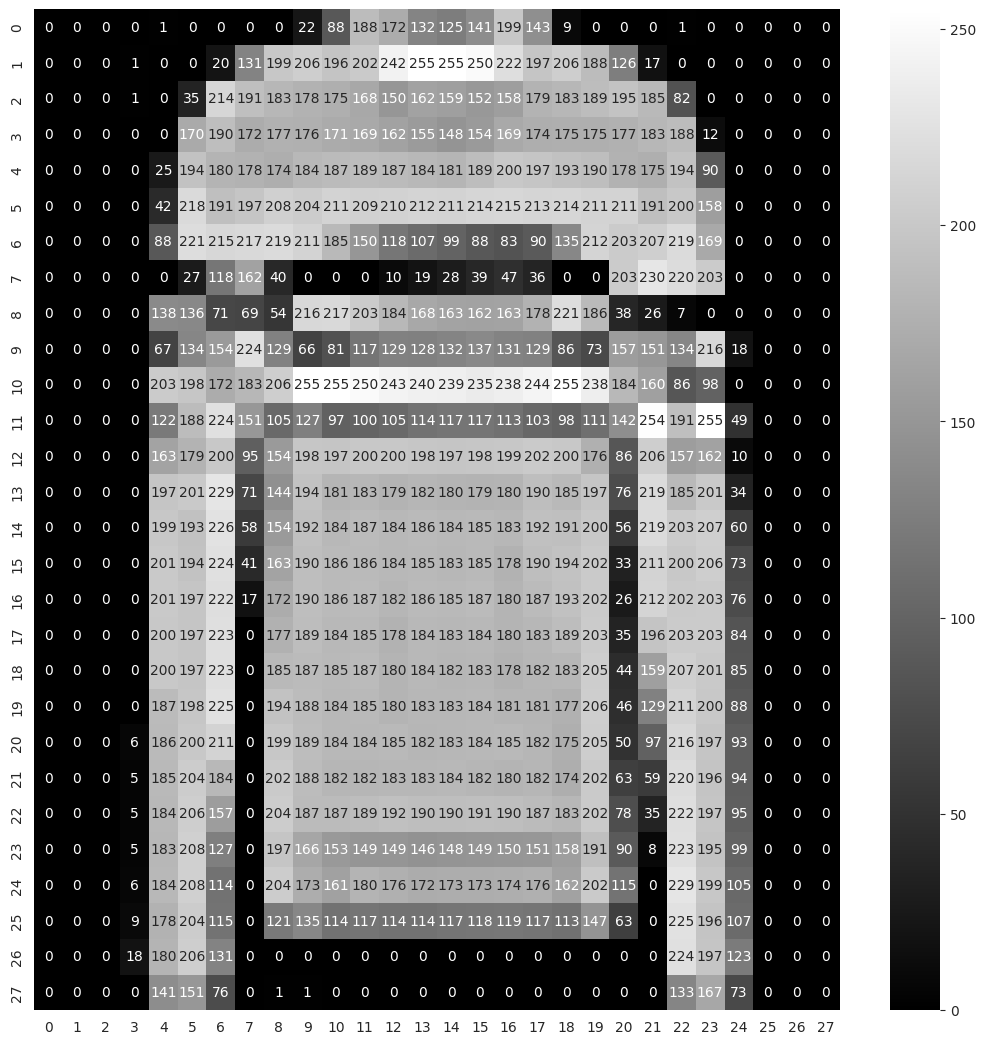

In [9]:
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[5], annot=True, cmap="gray", fmt=".3g")
# bilgisayar bunu nasıl görüyor ona bakıyoruz.(255'e yaklaştıkça beyaz 0'a yaklaştıkça siyah)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
y_train.shape

(60000,)

In [12]:
y_train[5]

2

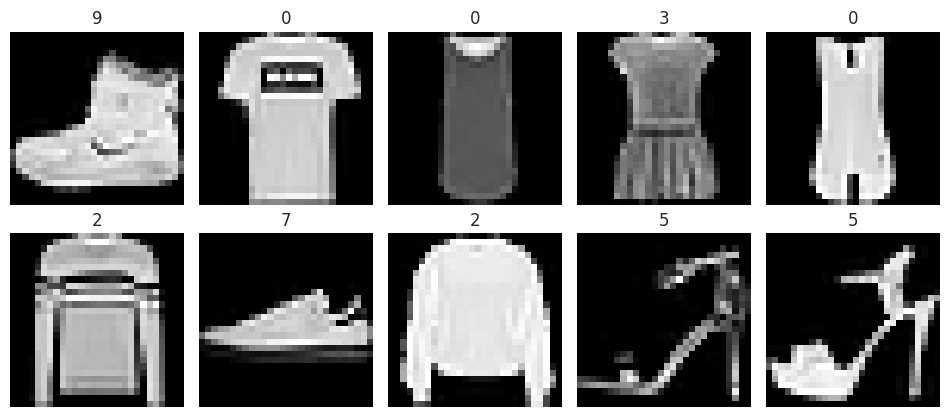

In [13]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.09, 'hspace':0.1}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title( y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

In [14]:
np.unique(y_train, return_counts=True)

# train setinde de test setinde de bütün class'lar eşit dağılmış datamız dengeli.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [15]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [16]:
y_train[0]

9

In [17]:
classes[int(y_train[0])] 

'Ankle boot'

In [18]:
classes[5]

'Sandal'

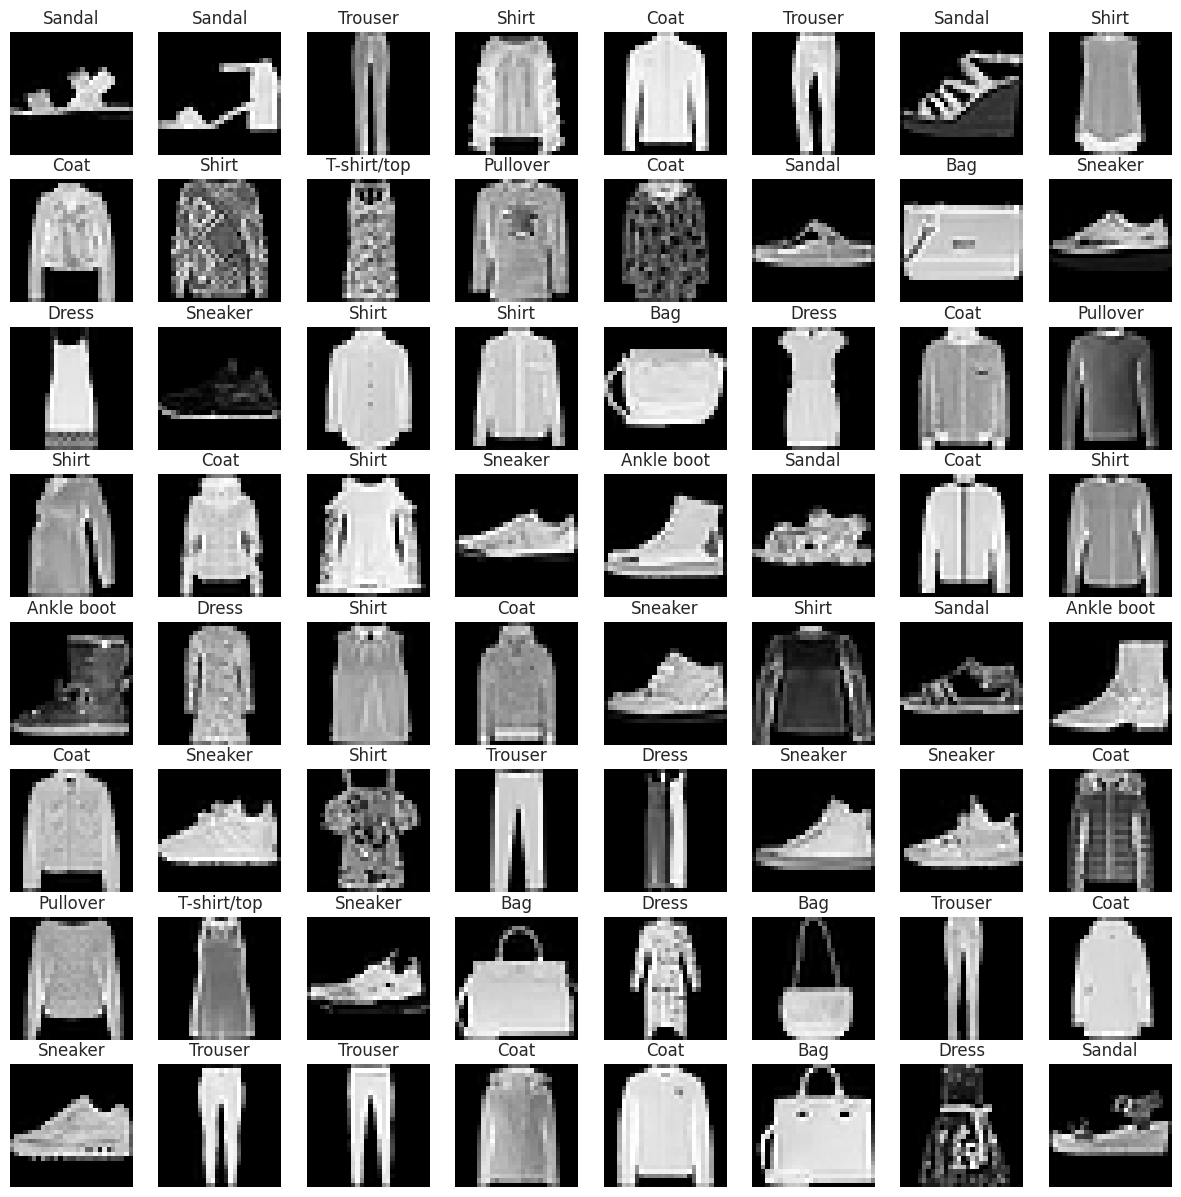

In [19]:
plt.figure(figsize=(15, 15))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(x_train[rand_index],cmap='gray')

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [20]:
x_train[9].min()

0

In [21]:
x_train[9].max()

255

In [22]:
# Normalize image pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

# MinMaxScaler yapmış oluyoruz aslında burada.
# minimum değerimiz 0 olduğundan Scaler kullanmadan bu şekilde scaling yapabiliriz. elimizdeki data resimde olsa scaling var!

In [23]:
x_train[9].min()

0.0

In [24]:
x_train[9].max()

1.0

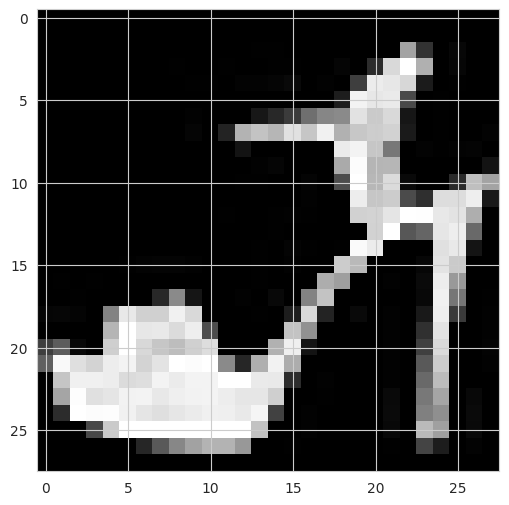

In [25]:
plt.imshow(x_train[9],cmap='gray')

# scale yaptık ama plt.imshow bunu anlıyor ve bize istediğimiz gibi yine resmi getiriyor.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [26]:
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [27]:
x_train.reshape(60000, 28, 28, 1).shape

# biz modelleme aşamasına geçtiğimizde bizden model kanal sayısını isteyecek ondan dolayı burada kanal sayısını da belirteceğiz.
# model kanal sayısını istiyor çünkü ona göre filtreleri vs ayarlıyor.

(60000, 28, 28, 1)

In [28]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# kanal sayısının ne olduğunu da belirttik.

In [29]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [30]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [31]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [34]:
# (60000, 10) her bir class'ı 10 elemanlı bir vektör şeklinde ifade edebiliyoruz

In [35]:
y_train[9]

# burada 4'ü temsil eden nöron 1 olsun diğerleri 0 olsun bu hale çevirdik to_categorical ile Y_train'i:

5

In [36]:
Y_train[9]

## kuracağımız mimariye uygun hale getirdik targetımızı.(output layer'a uygun şu anda.)
# fit aşamasında bu Y_train'i kullanacağımıza dikkat edelim.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [38]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='valid'))

                # 28 filtre olsun bunlar 3*3'lük filtreler olsun -------> filter_size = kernel_size
                # input_shape=(28, 28, 1) yine burada belirtebiliyoruz.

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='valid'))

model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))


model.add(Flatten()) # flatten ile vektörel hale getirip ann yapısına geçiyoruz.

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

## max_pooling2d katmanında eğitilecek bir parametre yoktur burada sadece downsampling oluyor 
## Flatten'da da yine eğitilecek bir parametre yoktur burada sadece ann mimarisine bir hazılık yapıyoruz.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 28)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 13552)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [40]:
((3 * 3 * 1) + 1) * 28

280

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

# cnn'de overfittinge gitme ihtimalimiz çok yüksektir bunun nedeni ; featurelar aslında çok fazla oluyor (feature learning)
# ama onlara karşılılık gelen data sayım o kadar fazla olmuyor genelde. bundan dolayı patience'ı cnn modellerinde düşük seçeriz.

In [43]:
model.fit(x_train, Y_train, batch_size=32, epochs=20, validation_data=(x_test,Y_test),callbacks=[early_stop]) 


Epoch 1/20
1875/1875 [==============================] - 20s 5ms/step - loss: 0.3822 - accuracy: 0.8618 - val_loss: 0.2898 - val_accuracy: 0.8927
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2475 - accuracy: 0.9083 - val_loss: 0.2750 - val_accuracy: 0.9014
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2009 - accuracy: 0.9255 - val_loss: 0.2512 - val_accuracy: 0.9103
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1603 - accuracy: 0.9397 - val_loss: 0.2457 - val_accuracy: 0.9135
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1309 - accuracy: 0.9508 - val_loss: 0.2447 - val_accuracy: 0.9198
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1032 - accuracy: 0.9617 - val_loss: 0.2726 - val_accuracy: 0.9153
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0824 - accuracy: 0.9694 - val_loss: 0.2977 - val_accuracy

In [44]:
model.metrics_names

['loss', 'accuracy']

In [45]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.382,0.862,0.290,0.893
1,0.247,0.908,0.275,0.901
2,0.201,0.925,0.251,0.910
3,0.160,0.940,0.246,0.914
4,0.131,0.951,0.245,0.920
5,0.103,0.962,0.273,0.915
6,0.082,0.969,0.298,0.916


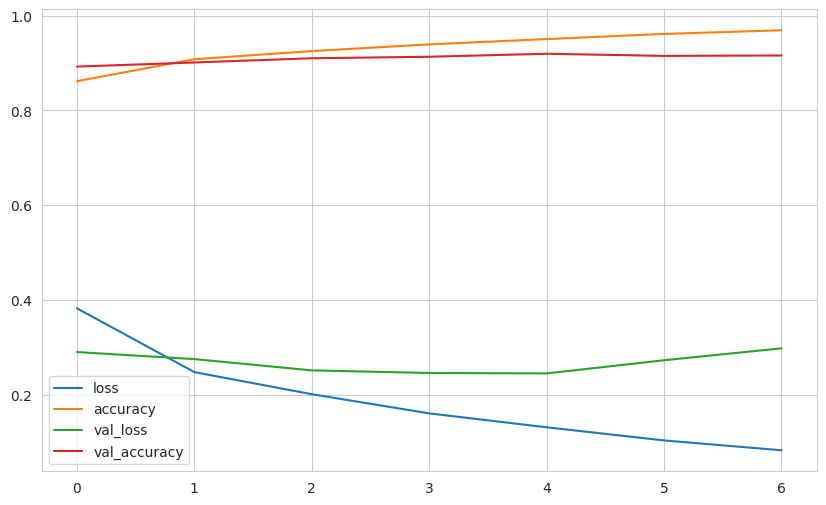

In [46]:
summary.plot();

**TASK 7: Plot values of metrics you used in your model.**

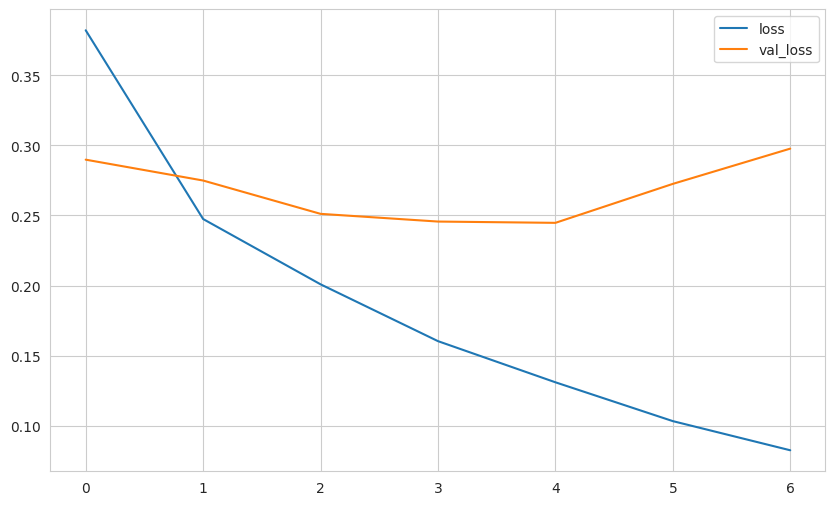

In [47]:
summary[["loss", "val_loss"]].plot();

# grafikleri böyle ayrı ayrı çizdirmekte fayda var ! : 

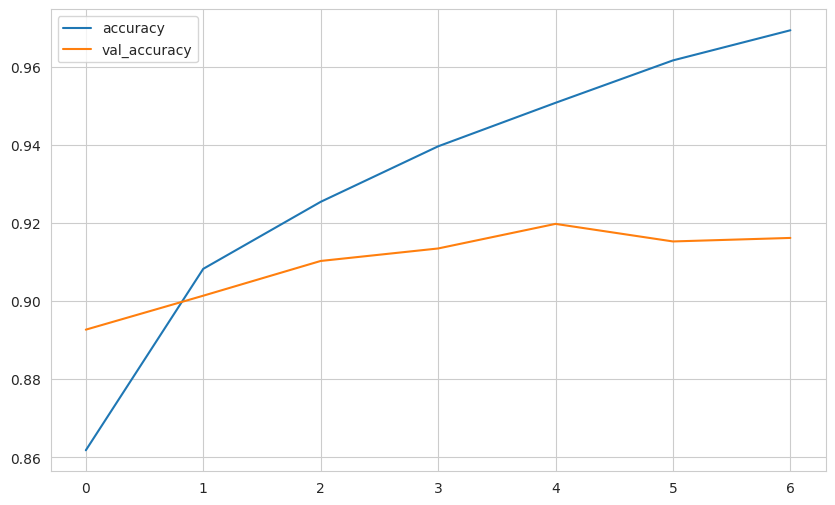

In [48]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [49]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [50]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2447 - accuracy: 0.9198


[0.24474796652793884, 0.9197999835014343]

In [51]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24474796652793884
Test accuracy: 0.9197999835014343


In [52]:
pred_prob = model.predict(x_test)
pred_prob
#her bir resim için 10 boyutlu bir vektör döndürüyor ------> olasılıklar bunlar 

313/313 [==============================] - 1s 2ms/step


array([[0.0000001 , 0.00000012, 0.        , ..., 0.00014671, 0.        ,
        0.99968374],
       [0.00000034, 0.        , 0.9999796 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.9999999 ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00000852, 0.        , 0.00000472, ..., 0.00023797, 0.00002584,
        0.0000157 ]], dtype=float32)

In [53]:
pred_prob.shape

(10000, 10)

In [54]:
pred_prob[0]
# ilk data için döndürdüğü olasılıklar : 

array([0.0000001 , 0.00000012, 0.        , 0.00000001, 0.00000003,
       0.00016932, 0.        , 0.00014671, 0.        , 0.99968374],
      dtype=float32)

In [55]:
np.argmax(pred_prob[0])

# np.argmax ------> bu vektördeki max değerin indexini almak için kullanıyoruz .

9

In [56]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

# pred_probların tamamına argmaxla class'larını alıyoruz ki classifaciton reporta bakalım :

array([9, 2, 1, ..., 8, 1, 5])

In [57]:
y_pred.shape

(10000,)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.89      0.87      1000
           3       0.93      0.93      0.93      1000
           4       0.83      0.91      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.83      0.70      0.76      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [59]:
print(confusion_matrix(y_test, y_pred))

[[888   1  26  10   6   2  63   0   4   0]
 [  4 979   1   9   4   0   3   0   0   0]
 [ 15   0 893   8  44   1  39   0   0   0]
 [ 12   1  13 930  33   0  11   0   0   0]
 [  0   0  42  21 912   0  25   0   0   0]
 [  0   0   0   0   0 983   0  13   0   4]
 [ 99   0  76  23  92   0 704   0   6   0]
 [  0   0   0   0   0   8   0 978   0  14]
 [  5   0   3   2   5   3   3   3 974   2]
 [  0   0   0   0   0   5   0  38   0 957]]


<Axes: >

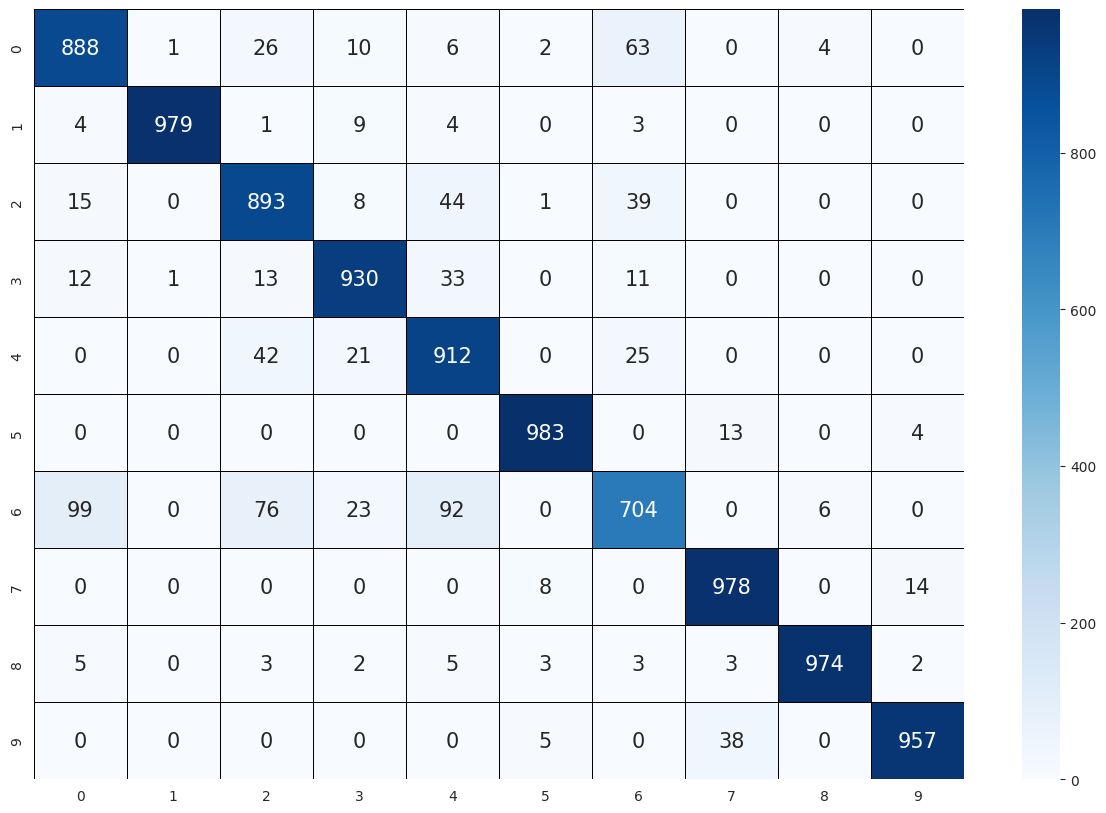

In [60]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [61]:
# y_test != y_pred
np.not_equal(y_test, y_pred)
# y_test, y_pred'i karşılaştırıp aynı olmayanları almak için np.not_equal'i kullanıyoruz.

array([False, False, False, ..., False, False, False])

In [62]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

# np.not_equal(y_test, y_pred).sum() ile True'ları toplayıp döndürüyor (toplam hatalı değer)

802

In [63]:
np.equal(y_test, y_pred).sum()

## toplam doğru tahmin sayısı.

9198

In [66]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

# BatchNormalization bir regularization tekniğidir ANN yapılarında da kullanılabilir.Ama özellikle CNN mimarilerinde 
# daha iyi performans gösterdiği gözlemlenmiş.

In [67]:
model = Sequential()

model.add(Conv2D(28, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(28, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 batch_normalization_3 (Batc  (None, 28, 28, 28)       112       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 28)       0         
 2D)                                                             
                                                      

In [69]:
early_stop = EarlyStopping(monitor='val_loss', mode = "min", patience=2, restore_best_weights = True)

In [72]:
model.fit(x_train, Y_train, batch_size=32, epochs=50, validation_data=(x_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 30s 12ms/step - loss: 0.9564 - accuracy: 0.6639 - val_loss: 0.4870 - val_accuracy: 0.8173
Epoch 2/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.5364 - accuracy: 0.8158 - val_loss: 0.3706 - val_accuracy: 0.8705
Epoch 3/50
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4415 - accuracy: 0.8552 - val_loss: 0.3039 - val_accuracy: 0.8970
Epoch 4/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3967 - accuracy: 0.8700 - val_loss: 0.2955 - val_accuracy: 0.8987
Epoch 5/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3673 - accuracy: 0.8807 - val_loss: 0.2833 - val_accuracy: 0.9011
Epoch 6/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3465 - accuracy: 0.8860 - val_loss: 0.2601 - val_accuracy: 0.9104
Epoch 7/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3222 - accuracy: 0.8945 - val_loss: 0.2418 -

In [73]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
9,0.287,0.905,0.240,0.918
10,0.280,0.908,0.224,0.922
11,0.274,0.910,0.217,0.924
12,0.263,0.914,0.230,0.920
13,0.259,0.914,0.241,0.917


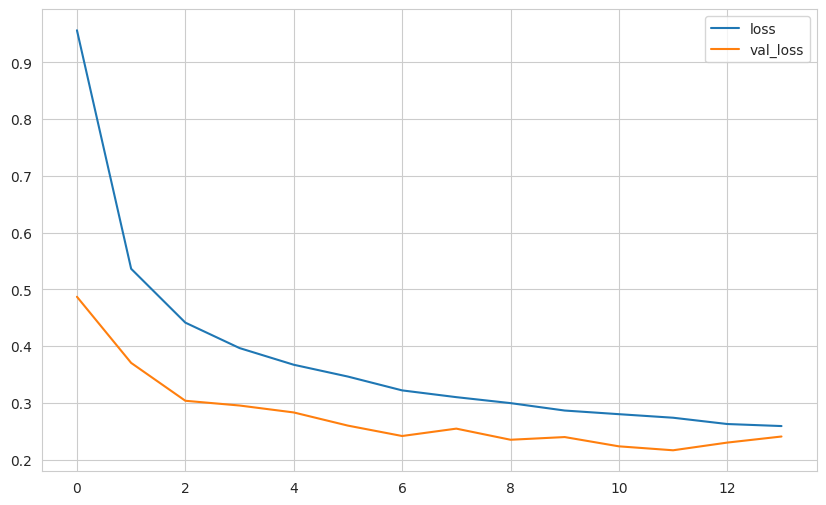

In [74]:
summary[["loss", "val_loss"]].plot();

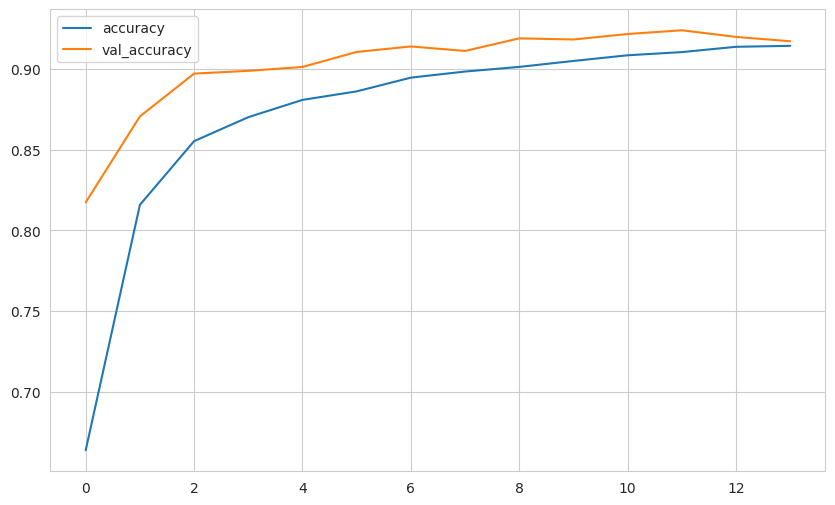

In [75]:
summary[["accuracy", "val_accuracy"]].plot();

# **Evaluation on Test Data**

In [78]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2167 - accuracy: 0.9238


[0.2166997790336609, 0.923799991607666]

In [79]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2166997790336609
Test accuracy: 0.923799991607666


In [ ]:
pred_prob = model.predict(x_test)

In [81]:
y_pred = np.argmax(pred_prob, axis=1)

In [82]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [83]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1000
           1       0.99      0.99      0.99      1000
           2       0.89      0.90      0.90      1000
           3       0.93      0.92      0.93      1000
           4       0.84      0.93      0.88      1000
           5       0.99      0.98      0.99      1000
           6       0.78      0.74      0.76      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.98      0.99      1000
           9       0.97      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



<Axes: >

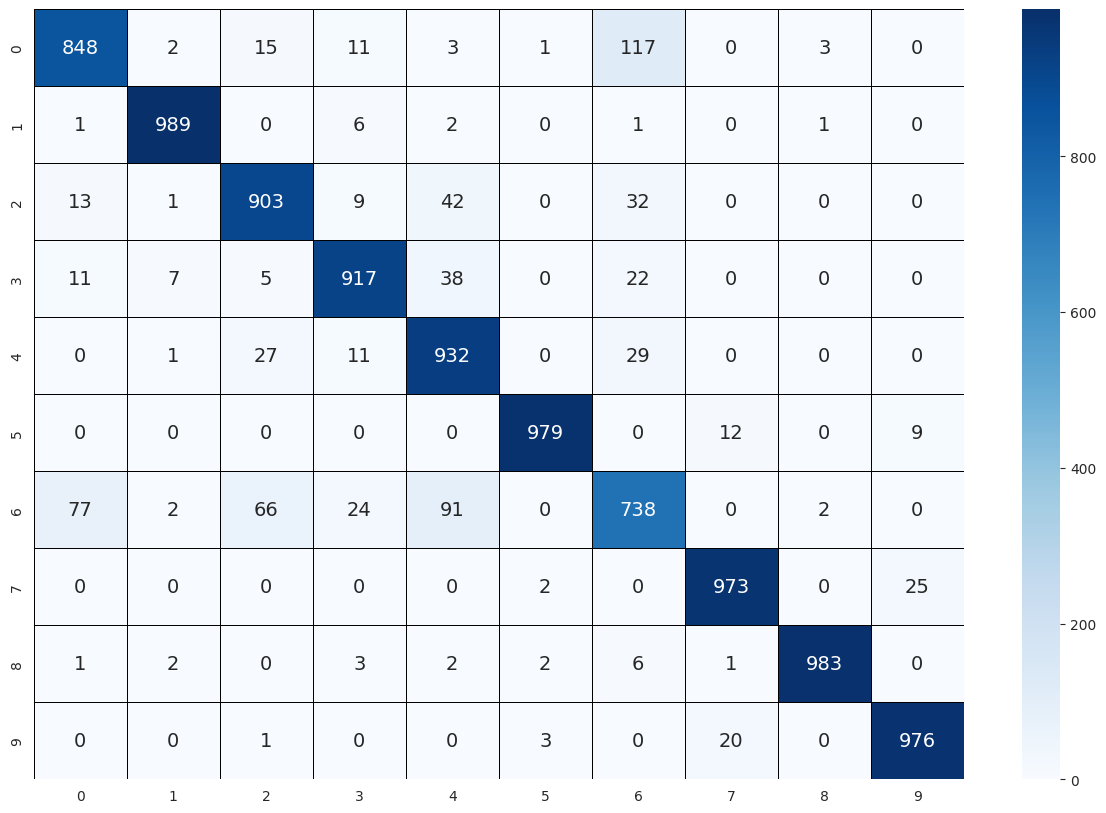

In [85]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [86]:
# y_test != y_pred
np.not_equal(y_test, y_pred)


array([False, False, False, ..., False, False, False])

In [87]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()


762

In [88]:
np.equal(y_test, y_pred).sum()

## toplam doğru tahmin sayısı.

9238

## Prediction

In [89]:
my_image = x_test[44]

In [90]:
my_image.shape

(28, 28, 1)

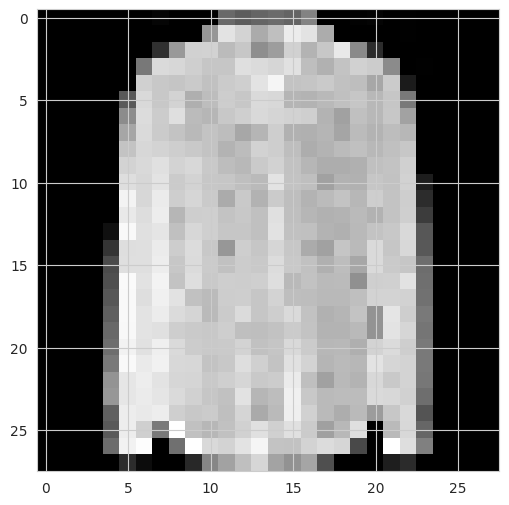

In [92]:
plt.imshow(my_image, cmap="gray")
plt.show()

In [ ]:
# prediction alacağımız zaman nasıl eğittiysek modeli o şekilde vereceğiz biz nasıl eğittik batch_size'lar halinde eğittik
# ondan dolayı burada da boyutlu hale getirmeliyiz ; ml'de de mesela df şeklinde eğitim yaptığımızdan prediction alacağımız 
# zaman da ona uygun hale getiriyorduk.

In [94]:
pred_prob = model.predict(my_image.reshape(1,28,28,1)) # tek bir resim olduğunu söylüyoruz.
pred_prob

1/1 [==============================] - 0s 254ms/step


array([[0.00110844, 0.00000038, 0.00206167, 0.00004098, 0.03565948,
        0.00000038, 0.9611236 , 0.00000004, 0.00000454, 0.00000057]],
      dtype=float32)

In [95]:
# SHAPE --> (num_images,width,height,color_channels)
y_pred = np.argmax(pred_prob)
y_pred

6

In [98]:
result=np.argmax(pred_prob , axis=1)

In [99]:
result

array([6])

In [100]:
classes[int(result)]

'Shirt'

In [101]:
model.save("cnn-1.h5")

### **Load the Saved Model and Get Predictions**

In [102]:
model=tf.keras.models.load_model('cnn-1.h5')

In [104]:
x_test[15].shape

(28, 28, 1)

In [105]:
np.expand_dims(x_test[15],axis=0).shape

(1, 28, 28, 1)

In [113]:
pred=model.predict(np.expand_dims(x_test[15],axis=0))

# X_test[15].reshape(1,28,28,1)

1/1 [==============================] - 0s 22ms/step


In [106]:
np.argmax(pred)

1

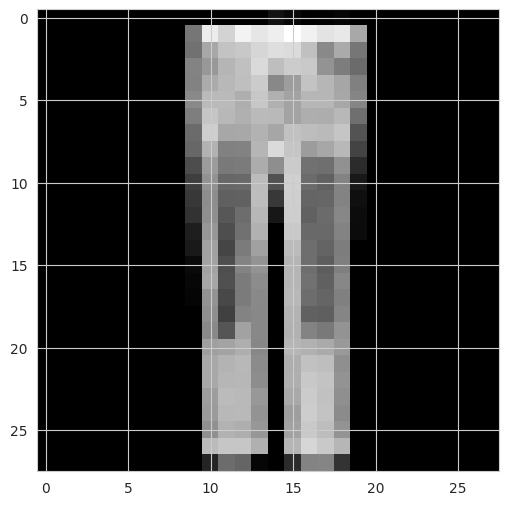

In [109]:
plt.imshow(x_test[15].reshape(28,28), cmap="gray")

In [112]:
classes[1]

'Trouser'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___